# Dynamic Stiffness Matrix (DSM) for *1D Rod on Visco-Elastic Support*

In this note book, we will introduce the 1D rod element on a Visco-Elastic Support in our PyDynSM library to you!

Firstly, the necessary libraries and predefined classes will be imported. 

In [1]:
# Import default libraries
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pydynsm as PDM


## 1-D Rod on Visco-Elastic support in harmonic motion

<center>
<img src="images_notebook\1D_rod_ViscoElasticV2.png" alt="f1" width="50%" height="40%">
</center>

> **Figure 1**: 1D Elastic Rod element on Visco-Elastic Supports with two *free ends*

### Theory


You can expect this type of a conditions for a pile that is subjected to a driving force. We will now see how DSM method works to get steady state response of this 1D elastic bar with Visco-Elastic Supports subjected to dynamic excitations:

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Step 1: Equation of Motion:</b> 

This system has the following form of equation of motion (EOM):

$$
\rho A\frac{\partial^2 u(x,t)}{\partial t^2} - EA\frac{\partial^2 u(x,t)}{\partial x^2} + k_d u(x,t) + c_d \frac{\partial u(x,t)}{\partial t} = 0, \quad 0<x<L
$$

Do you know that this EOM represents the Equilibrium of forces on a small differential element of the Rod?

We search for the solution to this EOM in the form 

$$
u(x,t) = \tilde{U}(x)\exp(i\Omega t)
$$

which is a Steady-State solution, because we assume the effect of Initial conditions have dampened out! $\Omega$ is the frequency of externally applied load.
<!-- If the wave velocity in 1D elastic bar $c_\mathrm{b}$ was defined as below:> 

$$
c_\mathrm{b} = \sqrt{\frac{E}{\rho}}
$$-

we could rewrite the equation of motion as:

$$
\frac{\partial^2 u(x,t)}{\partial t^2} - c^2_\mathrm{b}\frac{\partial^2 u(x,t)}{\partial x^2} + \frac{1}{\rho A} (k_d + \epsilon_d \frac{\partial}{\partial t}) u(x,t) = 0, \quad 0<x<L
$$ -->

</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Step 2: Boundary Conditions:</b> 

Assuming **harmonic force and displacements**, we have the following Boundary conditions at two nodes

*Dirichlet Boundary Conditions:*

at $x=0$：

$$
u(0,t) = \tilde{U}_1\exp{\left(\mathrm{i}\Omega t\right)}
$$

at $x=L$：

$$
u(L,t) = \tilde{U}_2\exp{\left(\mathrm{i}\Omega t\right)}
$$


If you write the corresponding Normal Force in the Rod at both the ends:

at $x=0$：

$$
N(0,t) = -\tilde{F}_1\exp{\left(\mathrm{i}\Omega t\right)}
$$

at $x=L$：

$$
N(L,t) = \tilde{F}_2\exp{\left({\mathrm{i}\Omega t}\right)}
$$
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Step 3: Reduced equations of motion and BCs:</b> 

By substituting the Steady-State solution into the EOM, we enter the Frequency domain

$$
\frac{d^2 \tilde U(x)}{d x^2} + \beta^2 \tilde U(x) = 0
$$

where $\displaystyle \beta = \sqrt \frac{\rho A \Omega^2 - k_d - i \Omega c_d}{EA}$

Substituting the Steady-State solution into the Boundary conditions, we convert them into Frequency domain (We get reduced from of Boundary conditions):
<!-- 
*Dirichilet Boundary Conditions:* -->

at $x=0$：

$$
\tilde U(0) = \tilde{U}_1
$$

at $x=L$：

$$
\tilde U(L) = \tilde{U}_2
$$

Corresponding Normal Forces (in Frequency Domain)

at $x=0$：

$$
EA\tilde U'(0) = -\tilde{F}_1
$$

at $x=L$：

$$
EA\tilde U'(L) = \tilde{F}_2
$$

</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Step 4: Forming DSMs:</b> 

Now, we successfully reduced our PDE to ODE in frequency domain.

The general solution to the EOM in the Frequency Domain is given as:

$$
\tilde U(x) = C_1\exp\left(-\mathrm{i}\alpha _1 x\right) + C_2\exp\left(-\mathrm{i}\alpha _2 x\right)
$$

where $\alpha _1 = +\beta$ and $\alpha _2 = - \beta $. We use -ve sign inside the exponential for Numerical Stability.

Subtitute above into *Dirichilet Boundary Conditions*, we have $\mathbf{U}=\mathbf{A}\mathbf{C}$

$$
\begin{bmatrix}
    \tilde U_1 \\
    \tilde U_2 \\
\end{bmatrix}
= 
\begin{bmatrix}
    A_{11}& A_{12} \\
    A_{21}& A_{22} \\
\end{bmatrix}

\begin{bmatrix}
    C_1 \\
    C_2 \\
\end{bmatrix}

$$


Similarly Operations to *Neumann Boundary Conditions*, we have $\mathbf{f}=\mathbf{B}\mathbf{C}$

$$
\begin{bmatrix}
    \tilde F_1 \\
    \tilde F_2 \\
\end{bmatrix}
= 
\begin{bmatrix}
    B_{11}& B_{12} \\
    B_{21}& B_{22} \\
\end{bmatrix}

\begin{bmatrix}
    C_1 \\
    C_2 \\
\end{bmatrix}
$$

Finally, we could have the expression for relationship between $\mathbf{f}$ and $\mathbf{U}$, which is

$$
\mathbf{f} = \left(\mathbf{B}\mathbf{A}^{-1}\right)\mathbf{U}=\mathbf{K}_\mathrm{d}\mathbf{U}
$$

where $\mathbf{K}_\mathrm{d} = \mathbf{B}\mathbf{A}^{-1}$ is the Element Dynamic stiffness matrix in the Local Coordinate system.

**Question 1**: Do you know that the Matrix form of Equation (f = $K_d$ U) represent Force equilibrium at Nodes?

**Question 2**: Does the dynamic stiffness matrix, Kd for a rod with Visco-Elastic supports look similar to that of a simple rod? Where is the difference? What is the physical meaning behind this similarity and the difference?

</div>

Ideally, this is how DSM method works! 

For given system, we could get nodal displacements once the nodal loading was given and the Element's Dynamic Stiffness Matrix (DSM) is known. However, the DSM may differ for different structural system (especially if we change boundary conditions of the elemnt!) which you will see later. 



Let us try to implement them using example below:

<center>
<img src="images_notebook\1Drod_Example.png" alt="f1" width="70%" height="60%">
</center>

> **Figure C1.2**: 1D elastic bar on Visco-Elastic Foundation with *one fixed end*

### Implementations

Our DSM method implementation is now completely stored in a local package, consisting of a few classes. If you need a refresher on how to code with Classes and Objects, refer to the [MUDE book on Object Oriented Programming](https://mude.citg.tudelft.nl/2023/book/external/learn-python/other_python_stuff/year2/python_topics/classes.html). 

But do not worry, you could still successfully apply them by following steps here.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Initialize assembler:</b> 

Firstly, we initialise an assembler with a project name, like`1D Rod with ViscoElastic Foundation` here. In this section, you can choose a name of the project you like! 

The assember class here is like the '*brain*' of DSM, where all analysis will be done.

</div>


In [2]:
Assembler = PDM.Assembler  #Import the Assembler class from the PDM module

s1 = Assembler('1D Rod with ViscoElastic Foundation',analysis_type='new')

Assembler '1D Rod with ViscoElastic Foundation' successfully initialised


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

You should see `Assembler '1D Rod with ViscoElastic Foundation' successfully initialised` by running cell above, suggesting our assembler is set correctly!

</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Define properties:</b> 

Then we define some parameters here, which would be used as material properties later:

</div>

In [3]:
# define material properties here
E = 7e6                                  # Young's modulus
A = 1                                 # Cross-sectional area
rho = 1e3                                  # Density
ksi = 0.01                                 # Damping coefficient

# define geometrical properties here
L = 1                                      # Length of the rod

# define loading parameters here
F_0 = 1e06 + 0j                            # Force amplitude                                  
Omega = 100                                # Force frequency

kd = 1e06                             # Distributed Spring stiffness
cd = 1e06                             # Distributed Spring stiffness

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Create nodes:</b> 

Then we create nodes by using `CreateNode(A,B)` from the class `assemble`, where `(A,B)` is the catersian coordinate of a specific node.
</div>

In [4]:
node1 = s1.CreateNode(0,0)
node2 = s1.CreateNode(L,0)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

Now `assemble` should have already assign `(A,B)` as one of the *attributes* for `assemble.node` class, we can check it by function `get_coords()`

</div>

In [5]:
print(f'The coordinate of node 1 is {node1.get_coords()}')
print(f'The coordinate of node 2 is {node2.get_coords()}')

The coordinate of node 1 is (0, 0, 0)
The coordinate of node 2 is (1, 0, 0)


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Create elements:</b>

After drawing points, the next thing to do is connecting them by one `element`, similarly, we could simply use `CreateElement([node A, node B])` function from class `assembler`.

where `node A` and `node B` are created `node`

</div>

In [6]:
elem = s1.CreateElement([node1, node2])

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

Finally, we could visualize created nodes and elements by using function `Plotstructure()`

</div>

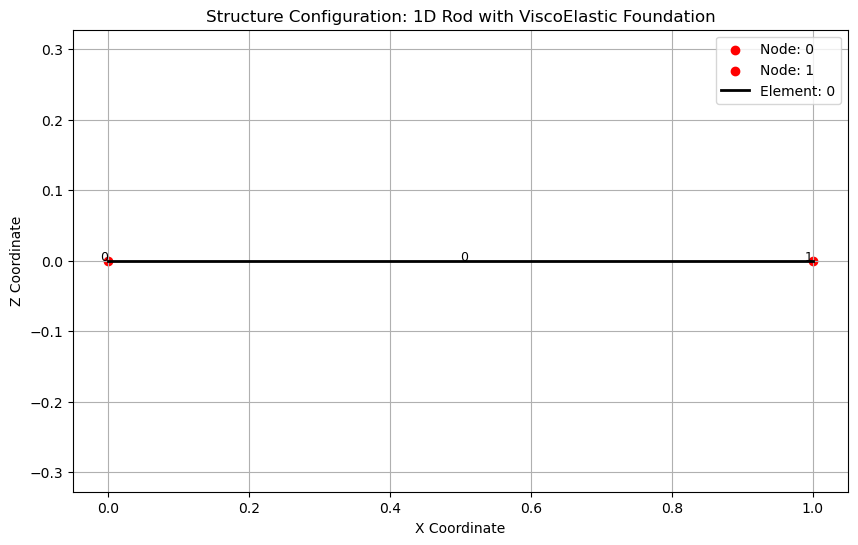

In [7]:
s1.PlotStructure(plot_elements=True)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Add constraints:</b> 

Next step is to fix node 1, we have several ways to do that!

let us firstly try `fix_node()` function from `node` class, which is used to fix all DoFs of given node.

</div>

In [8]:
node1.fix_node('x','z', 'phi_y')
node2.fix_node('z', 'phi_y')

Global DOF 'x' for node 0 updated to 0.
Global DOF 'x' with value '0' applied to connected elements.
Global DOF 'z' for node 0 updated to 0.
Global DOF 'z' with value '0' applied to connected elements.
Global DOF 'phi_y' for node 0 updated to 0.
Global DOF 'phi_y' with value '0' applied to connected elements.
Global DOF 'z' for node 1 updated to 0.
Global DOF 'z' with value '0' applied to connected elements.
Global DOF 'phi_y' for node 1 updated to 0.
Global DOF 'phi_y' with value '0' applied to connected elements.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

After running the cell above, you should see:

`Global DOF 'x' with value '0' applied to connected elements.`

`Global DOF 'z' with value '0' applied to connected elements.`

`Global DOF 'phi_y' with value '0' applied to connected elements.`

which suggests three degrees of freedoms of node1 have been fixed successfully! 

</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Add constraints:</b> 

Alternatively, we can still do that from `element` class, using `.fix_dof(nodeA, dofs)`, here `nodeA` and `dofs` stands for specific node and dofs you want to fix!

For instance, we want to fix DoF `[x, z, phi_y]` of `node1` by running cell below:


</div>

In [9]:
elem.fix_dof(node1, 'x', 'z', 'phi_y')
elem.fix_dof(node2, 'z', 'phi_y')

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Set section:</b> 

After drawing element, we want set section properties for the element here.

In our method, element could be characterised by `element type` and `element properties`.

Here we use `set_section(element type, element properties)`, where `element type` should be `Rod` if we want to draw a *1D rod* as shown in Figure C1.1. 

Besides, it is also supposed to have some material properties like `EA` ($EA$) and `rhoA` ($\rho A$).

</div>

In [10]:
# elem.SetSection('Rod', {EA, rhoA})
# elem.SetSection('Rod', {'E': E, 'A': A, 'rho': rho, 'ksi': ksi})	
elem.SetSection('Rod over viscoelastic foundation', {'E': E, 'A': A, 'rho': rho, 'ksi': ksi, 'L': L, 'kd': kd, 'cd': cd})	

Successfully added element of type: Rod over viscoelastic foundation to Element 0


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Set section:</b> 

Run cell above, you should see

`Exception occurred - Missing required parameters for element 'Rod': rho, A, E`

which suggests that the element has been defined successfully in terms of their `type` and `properties`.

Let us try some other type like `Rod1`, which is not one of our products in the `Element Factory`, to see what will happen.

</div>

In [11]:
# elem.SetSection('Rod1', {'EA': EA, 'rhoA':rhoA})

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

Run cell above, you should see

`Exception occurred - No element registered with name: Rod1.`

It seems that `Rod1` does not match our method successfully :(  Please use the right name for element!

You should also see some other products, and you may use some of them later.

- `Rod over viscoelastic foundation`
- `Rayleigh-Bishop Rod`
- `Rayleigh-Love Rod`
- `EulerBernoulli Beam`
- `EulerBernoulli Beam with foundation`
- `Tensioned EulerBernoulli Beam`
- `Rayleigh Beam`


</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Define load in frequency domain:</b> 

Now we want to define a harmonic load $F_0\cos(\Omega t)$ in frequency domain by **Fourier Transform**.

**Question**: Try to derive fourier transform of a harmonic function with single frequency as well as unit amplitude $\cos\left(\Omega t\right)$, What should the signal look like in freuqency domain?

**Answer**: $\mathcal{F}\{\cos(\omega_0 t)\} = \pi \left[ \delta(\omega - \Omega) + \delta(\omega + \Omega) \right]$

You should notice that it has two spikes in the frequency domain, we are interested in the spike related to $+\Omega$, which is  $\delta(\omega - \Omega)$, hence the force in frequency domain should be in the form:

$$
\tilde F = F_0\delta(\omega - \Omega)
$$

which means it has amplitude only if $\omega = \Omega$

Here we could use `lambda` function to define the load, also a plot was generated to see how the force looks like:

c:\Users\srich\anaconda3\envs\mude-opt\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\srich\anaconda3\envs\mude-opt\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\srich\anaconda3\envs\mude-opt\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


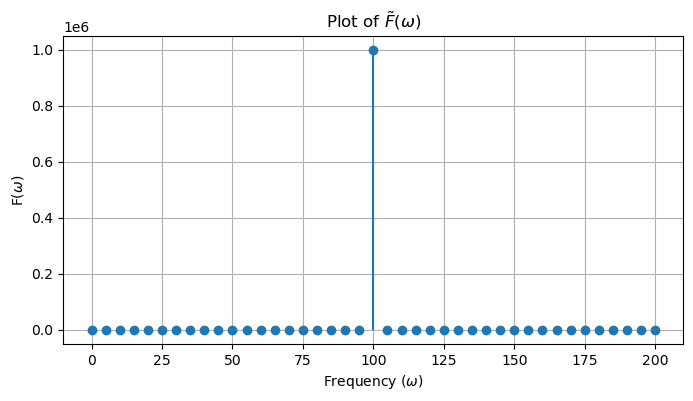

In [12]:
tolerance = 1e-17
F_omega = lambda omega: F_0 if abs(omega - Omega) < tolerance else 0


# draw a diagram to see how it looks like:


# Generate the range of omega values
omega_values = np.linspace(0, 200, 41)
F_values_lambda = [F_omega(omega) for omega in omega_values]

# Plot the result using the lambda function
plt.figure(figsize=(8, 4))
plt.stem(omega_values, F_values_lambda, basefmt=" ")
plt.xlabel('Frequency ($\omega$)')
plt.ylabel('F($\omega$)')
plt.title(r'Plot of $\tilde{F}(\omega)$')
plt.grid(True)
plt.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Get the global constrained stiffness and force:</b> 

Since `node`, `element` and load have already be defined, now we want to assemble the **global dynamic stiffness matrix $\mathbf{K}_\mathrm{d}(\omega)$** and **Force vector $\mathbf{F}$**:

In [13]:
# F_global = s1.GlobalForce(100)
node2.add_load(x=F_omega)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Conectivity informaion</b>

It seems the load has been defined correctly in frequency domain before being added to the free node here. Normally, we did it by using function `.add_load(x=F_x,y=F_y,z=F_z)` under `node` class.

</div>

In [14]:
s1.run_connectivity()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Get the global stiffness and force:</b> 

Since `node`, `element` and load have already be well-defined, now we want to assemble the **global dynamic stiffness matrix $\mathbf{K}_\mathrm{d}(\Omega)$** and **Force vector $\mathbf{F}$**.

In [15]:
K_global = s1.GlobalStiffness(Omega)
F_global = s1.GlobalForce(Omega)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Obtain constrained global stiffness and force:</b> 

Now we want to get constrained **global dynamic stiffness matrix** `Kc_global` and **Force vector** `Fc_global` in terms of *dirichilet boundary conditions*. 

It is called *static condensation* (see also lectures slides of matrix method in statics part). We could make a subdivision of matrix based on 2 types of DoFs

- $f$ - free dofs
- $c$ - constrained dofs

$$
\left[
\begin{array}{c:c}
\mathbf{K}_{cc}(\Omega) & \mathbf{K}_{cf}(\Omega)\\
\hdashline
\mathbf{K}_{fc}(\Omega) & \mathbf{K}_{ff}(\Omega)
\end{array}
\right]
\left[
\begin{array}{c}
\mathbf{u}_c(\Omega)\\
\hdashline
\mathbf{u}_f(\Omega)
\end{array}
\right]
=
\left[
\begin{array}{c}
\mathbf{f}_c(\Omega)\\
\hdashline
\mathbf{f}_f(\Omega)
\end{array}
\right]
$$

We could easily derive from the second equation:
$$
\mathbf{K}_{ff}(\Omega)\mathbf{u}_f(\Omega)=\mathbf{f}_f(\Omega)-\mathbf{K}_{fc}(\Omega)\mathbf{u}_c(\Omega)
$$

In our case, functions `.GlobalConstrainedStiffness(Omega)` and  `.GlobalConstrainedForce(Omega)` implements theories above. 

Their outputs `Kc_global` and  `Fc_global` are $\mathbf{f}_f(\Omega)-\mathbf{K}_{fc}(\Omega)\mathbf{u}_c(\Omega)$ and $\mathbf{K}_{ff}(\Omega)\mathbf{u}_c(\Omega)$, respectively.

In [16]:
Kc_global = s1.GlobalConstrainedStiffness(Omega)
Fc_global = s1.GlobalConstrainedForce(Omega)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Solve free-end displacement:</b> 

Now we want to solve free end displacement $\mathbf{u}_{f}$ when $\omega = \Omega$ based on:

$$
\mathbf{K}_{ff}(\Omega)\mathbf{u}_f(\Omega)=\mathbf{f}_f(\Omega)-\mathbf{K}_{fc}(\Omega)\mathbf{u}_c(\Omega) \Rightarrow \mathbf{u}_f(\Omega)=\mathbf{K}^{-1}_{ff}(\Omega)\left\{\mathbf{f}_f(\Omega)-\mathbf{K}_{fc}(\Omega)\mathbf{u}_c(\Omega)\right\}
$$

Our equation solver `.SolveUfree(Kc_globa,Fc_global)` implements idea above.

In [17]:
u_free = s1.SolveUfree(Kc_global, Fc_global)
print(f'The free end vibration solution is {u_free}')

The free end vibration solution is [0.02473982-0.0280495j]


### Sanity check

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Check Displacement and Reactions:</b> 

It's a good time to check the sanity of our method.

Now make our harmonic excitation to have a single amplitude $\hat{F}_0$ at all frequencies, then we will compute and plot

- Free end displacement
- Recations at fixed end

over the freuqency range $\omega_\mathrm{test} = [0,1000] \text{ rad/s}$.

</div>

In [18]:
omega_values_check_test = np.linspace(0, 2500, 2500)

print(f'The omega values are {omega_values_check_test}')
# print(len(omega_values_check_test))

displacements_check = []
reaction_check = []

s2 = Assembler('1D Rod with ViscoElastic Foundation',analysis_type='new')

node3 = s2.CreateNode(0,0)
node4 = s2.CreateNode(L,0)
elem2 = s2.CreateElement([node3, node4])

node3.fix_node('x','z', 'phi_y')
node4.fix_node('z', 'phi_y')
elem2.SetSection('Rod over viscoelastic foundation', {'E': E, 'A': A, 'rho': rho, 'ksi': ksi, 'L': L, 'kd': kd, 'cd': cd})
s2.run_connectivity()

node4.add_load(x=F_0)

for omega_test in omega_values_check_test:

    K_global_test = s2.GlobalStiffness(omega_test)
    F_global_test = s2.GlobalForce(omega_test)

    Kc_global_test = s2.GlobalConstrainedStiffness(omega_test)
    Fc_global_test = s2.GlobalConstrainedForce(omega_test)

    u_free = s2.SolveUfree(Kc_global_test, Fc_global_test) # Free end solution
    H_fix =  s2.SupportReactions(K_global_test,u_free,F_global_test) # Reaction forces at the fixed end

    displacements_check.append(u_free)
    reaction_check.append(H_fix[0])

The omega values are [0.00000000e+00 1.00040016e+00 2.00080032e+00 ... 2.49799920e+03
 2.49899960e+03 2.50000000e+03]
2500
Assembler '1D Rod with ViscoElastic Foundation' successfully initialised
Global DOF 'x' for node 2 updated to 0.
Global DOF 'x' with value '0' applied to connected elements.
Global DOF 'z' for node 2 updated to 0.
Global DOF 'z' with value '0' applied to connected elements.
Global DOF 'phi_y' for node 2 updated to 0.
Global DOF 'phi_y' with value '0' applied to connected elements.
Global DOF 'z' for node 3 updated to 0.
Global DOF 'z' with value '0' applied to connected elements.
Global DOF 'phi_y' for node 3 updated to 0.
Global DOF 'phi_y' with value '0' applied to connected elements.
Successfully added element of type: Rod over viscoelastic foundation to Element 1


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Displacement Plots:</b> 

By running codes in the cell above, we already have the displacement under harmonic loading with different loading frequencies, then we want to plot $\mathrm{Re}\left[\tilde{u}_\mathrm{free}(\omega_\mathrm{test})\right]\!-\!\omega$ and $\mathrm{Im}\left[\tilde{u}_\mathrm{free}(\omega_\mathrm{test})\right]\!-\!\omega_\mathrm{test}$ curves.

</div>

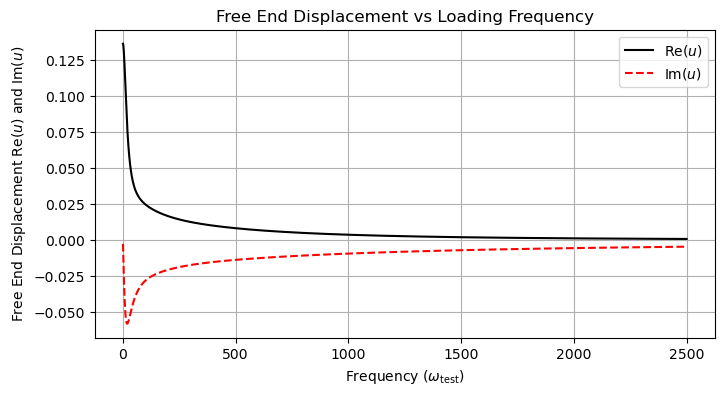

In [19]:
# %%% Plot the displacement results
plt.figure(figsize=(8, 4))
plt.plot(omega_values_check_test, [u.real for u in displacements_check], 'k',label='$\mathrm{Re}(u)$')
plt.plot(omega_values_check_test, [u.imag for u in displacements_check], 'r--',label='$\mathrm{Im}(u)$')
plt.xlabel('Frequency ($\omega_\mathrm{test}$)')
plt.ylabel('Free End Displacement $\mathrm{Re}(u)$ and $\mathrm{Im}(u)$')
plt.title('Free End Displacement vs Loading Frequency')
# plt.xlim(0, 1000)
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# print(ksi)
# print(type(elem))
# print(type(s1))

In [21]:
# print(f'The stiffness matrix is {K_global}')

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b> Sanity Checks to compare Maple & Python:</b> 

Let's also compare few other results with those from Maple. You are encouraged to do this in Maple and verify the results for different set of values. The Maple files with similar values are made available to you!

In [22]:
from pydynsm.elements import Rod1D_foundation

# define material properties here
E = 7e6                                  # Young's modulus
A = 1                                 # Cross-sectional area
rho = 1e3                                  # Density
ksi = 0.01                                 # Damping coefficient

# define geometrical properties here
L = 1                                      # Length of the rod

# define loading parameters here
# F_0 = 1e06                            # Force amplitude                                  
F_0 = 1e06 + 0j                            # Force amplitude                                  
Omega = 100                                # Force frequency

kd = 1e06                             # Distributed Spring stiffness
cd = 1e06                             # Distributed damping coefficient

Let's compare the values of Wavenumbers!

In [23]:
# Print wave numbers
Rod_check = Rod1D_foundation(rho, A, E, L, kd, ksi, cd)

print(Rod_check.ElementWaveNumbers(Omega))

((2.7694933714741006-2.582729829986666j), (-2.7694933714741006+2.582729829986666j))


Let's look at the DSM, $K_d$

In [24]:
DSM_Kd = Rod_check.LocalStiffness(Omega)
print(DSM_Kd)

[[17686039.51704487+20052072.23937558j
   1396955.30843527 +3773737.06402942j]
 [ 1396955.30843527 +3773737.06402942j
  17686039.51704487+20052072.23937558j]]
